# Advanced Micro

## Edgeworth Box - Efficiency in production allocation

Taken from Jonathan Conning (for more, see his [github](https://nbviewer.jupyter.org/github/jhconning/Dev-II/blob/master/notebooks/EdgeworthProduction.ipynb) or go directly [here](https://github.com/jhconning))

## Code

> _To keep the presentation tidy I've put the code that is used in the notebook above at the end of the notebook. Run all code below this cell first. Then return and run all code above._

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, fixed

In [3]:
ALPHA = 0.6   # capital share in agriculture
BETA = 0.4   # 

KBAR = 100
LBAR = 100

p = 1      # =Pa/Pm  relative price of ag goods

def F(K,L,alpha=ALPHA):
    """Agriculture Production function"""
    return (K**alpha)*(L**(1-alpha))

def G(K,L,beta=BETA):
    """Manufacturing Production function"""
    return (K**beta)*(L**(1-beta))

def budgetc(c1, p1, p2, I):
    return (I/p2)-(p1/p2)*c1

def isoq(L, Q, mu):
    return (Q/(L**(1-mu)))**(1/mu)

In [4]:
def edgeworth(L, Kbar=KBAR, Lbar=LBAR,alpha=ALPHA, beta=BETA):
    """efficiency locus: """
    a = (1-alpha)/alpha
    b = (1-beta)/beta
    return b*L*Kbar/(a*(Lbar-L)+b*L)

In [5]:
def edgeplot(LA, Kbar=KBAR, Lbar=LBAR,alpha=ALPHA,beta=BETA):
    """Draw an edgeworth box
    
    arguments:
    LA -- labor allocated to ag, from which calculate QA(Ka(La),La) 
    """
    KA = edgeworth(LA, Kbar, Lbar,alpha, beta)
    RTS = (alpha/(1-alpha))*(KA/LA)
    QA = F(KA,LA,alpha)
    QM = G(Kbar-KA,Lbar-LA,beta)
    print("(LA,KA)=({:4.1f}, {:4.1f})  (QA, QM)=({:4.1f}, {:4.1f})  RTS={:4.1f}"
          .format(LA,KA,QA,QM,RTS))
    La = np.arange(1,Lbar)
    fig, ax = plt.subplots(figsize=(7,6))
    ax.set_xlim(0, Lbar)
    ax.set_ylim(0, Kbar)
    ax.plot(La, edgeworth(La,Kbar,Lbar,alpha,beta),'k-')
    #ax.plot(La, La,'k--')
    ax.plot(La, isoq(La, QA, alpha))
    ax.plot(La, Kbar-isoq(Lbar-La, QM, beta),'g-')
    ax.plot(LA, KA,'ob')
    ax.vlines(LA,0,KA, linestyles="dashed")
    ax.hlines(KA,0,LA, linestyles="dashed")
    ax.text(-6,-6,r'$O_A$',fontsize=16)
    ax.text(Lbar,Kbar,r'$O_M$',fontsize=16)
    ax.set_xlabel(r'$L_A -- Labor$', fontsize=16)
    ax.set_ylabel('$K_A - Capital$', fontsize=16)
    #plt.show()

In [6]:
def ppf(LA,Kbar=KBAR, Lbar=LBAR,alpha=ALPHA,beta=BETA):
    """Draw a production possibility frontier
    
    arguments:
    LA -- labor allocated to ag, from which calculate QA(Ka(La),La) 
    """
    KA = edgeworth(LA, Kbar, Lbar,alpha, beta)
    RTS = (alpha/(1-alpha))*(KA/LA)
    QA = F( KA,LA,alpha)
    QM = G(Kbar-KA,Lbar-LA,beta)
    ax.scatter(QA,QM)
    La = np.arange(0,Lbar)
    Ka = edgeworth(La, Kbar, Lbar,alpha, beta)
    Qa = F(Ka,La,alpha)
    Qm = G(Kbar-Ka,Lbar-La,beta)
    ax.set_xlim(0, Lbar)
    ax.set_ylim(0, Kbar)
    ax.plot(Qa, Qm,'k-')
    ax.set_xlabel(r'$Q_A$',fontsize=18)
    ax.set_ylabel(r'$Q_B$',fontsize=18)
    plt.show()

> _It's interesting to note that for Cobb-Douglas technologies you really need quite a difference in capital-intensities between the two technologies in order to get much curvature to the production function._

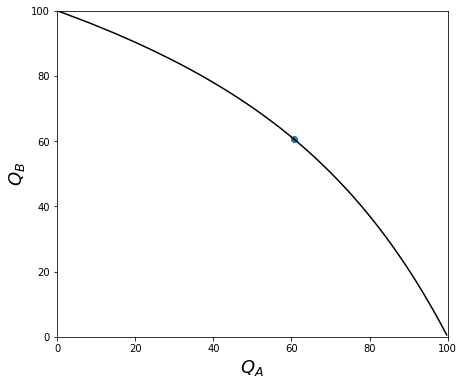

In [7]:
fig, ax = plt.subplots(figsize=(7,6))
ppf(20,alpha =0.8, beta=0.2)

### Code for Stolper Samuelson Line

In [8]:
def wreq(p,a=ALPHA, b=BETA):
    B = ((1-a)/(1-b))*(a/(1-a))**a  * ((1-b)/b)**b
    return B*p

In [9]:
def ssline(a=ALPHA, b=BETA):
    p = np.linspace(0.1,10,100)
    plt.title('The Stolper-Samuelson line')
    plt.xlabel(r'$p = \frac{P_a}{P_m}$', fontsize=18)
    plt.ylabel(r'$ \frac{w}{r}$', fontsize=18)
    plt.plot(p,wreq(p, a, b));

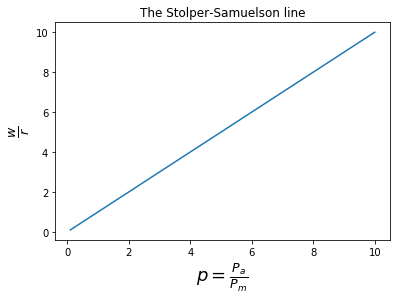

In [10]:
ssline()

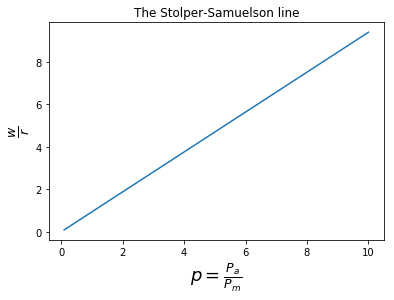

In [11]:
ssline(a=0.6, b=0.3);

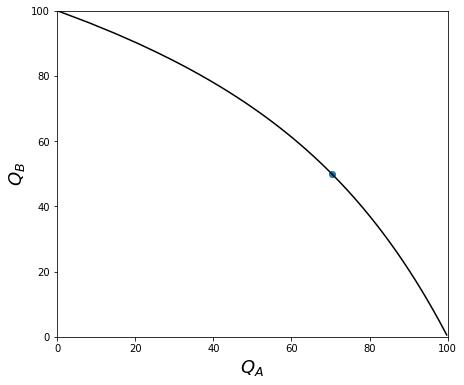

In [12]:
fig, ax = plt.subplots(figsize=(7,6))
ppf(30,alpha =0.8, beta=0.2)

(LA,KA)=(50.0, 69.2)  (QA, QM)=(60.8, 41.2)  RTS= 2.1


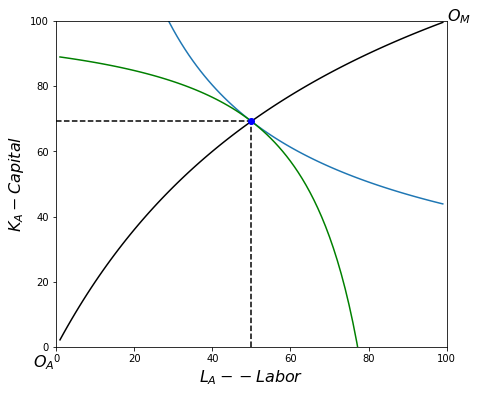

In [15]:
edgeplot(50)